In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from datetime import date

%matplotlib inline

In [2]:
train_data = pd.read_csv('train_values.csv')
label_data = pd.read_csv('train_labels.csv')
exploration_data = train_data.merge(label_data, on="row_id")
exploration_data.to_csv("data_exploration.csv")

In [3]:
exploration_data.describe().to_csv("numeric_data.csv")

In [4]:
def print_columns_medians(dframe, req_columns):
    for col in req_columns:
        print(dframe[col].median())

num_cols = ['loan_type','property_type','loan_purpose','occupancy','loan_amount','preapproval','msa_md','state_code','county_code','applicant_ethnicity','applicant_race','applicant_sex','applicant_income','population','minority_population_pct','ffiecmedian_family_income','tract_to_msa_md_income_pct','number_of_owner-occupied_units','number_of_1_to_4_family_units','lender','rate_spread']
print_columns_medians(exploration_data, num_cols)

2.0
1.0
1.0
1.0
116.0
3.0
261.0
30.0
181.0
2.0
5.0
1.0
56.0
4959.0
25.996
63485.0
98.959
1304.0
1799.0
1834.0
1.0


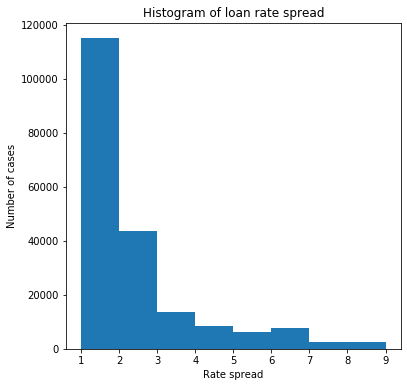

In [5]:
def plot_histogram(auto_prices, cols, bins):
    for col in cols:
        fig = plt.figure(figsize=(6,6)) # define plot area
        ax = fig.gca() # define axis    
        auto_prices[col].plot.hist(ax = ax, bins = bins) # Use the plot.hist method on subset of the data frame
        ax.set_title('Histogram of loan rate spread') # Give the plot a main title
        ax.set_xlabel('Rate spread') # Set text for the x axis
        ax.set_ylabel('Number of cases')# Set text for y axis
        plt.show()
        
num_cols = ['rate_spread']    
bins_edges = [1,2,3,4,5,6,7,8,9]
plot_histogram(exploration_data, num_cols, bins_edges)

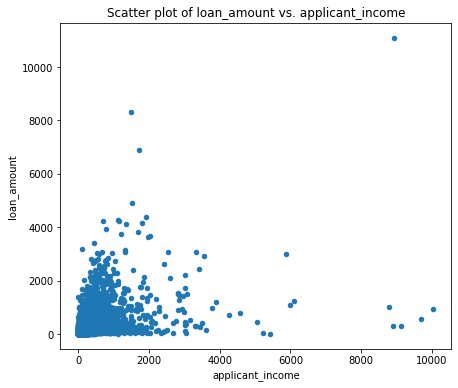

In [6]:
def plot_scatter(auto_prices, cols, col_y = 'loan_amount'):
    for col in cols:
        fig = plt.figure(figsize=(7,6)) # define plot area
        ax = fig.gca() # define axis   
        auto_prices.plot.scatter(x = col, y = col_y, ax = ax)
        ax.set_title('Scatter plot of ' + col_y + ' vs. ' + col) # Give the plot a main title
        ax.set_xlabel(col) # Set text for the x axis
        ax.set_ylabel(col_y
                     )# Set text for y axis
        plt.show()

num_cols = ['applicant_income']
plot_scatter(exploration_data, num_cols)        

In [7]:
cat_cols = ['msa_md','state_code', 'county_code', 'lender', 'loan_type','property_type', 'loan_purpose', 'occupancy', 'preapproval', 'applicant_ethnicity', 'applicant_race', 'applicant_sex']


In [8]:
exploration_data.isnull().values.any()

True

In [9]:
exploration_data.isna().sum()

row_id                                0
loan_type                             0
property_type                         0
loan_purpose                          0
occupancy                             0
loan_amount                           0
preapproval                           0
msa_md                                0
state_code                            0
county_code                           0
applicant_ethnicity                   0
applicant_race                        0
applicant_sex                         0
applicant_income                  10708
population                         1995
minority_population_pct            1995
ffiecmedian_family_income          1985
tract_to_msa_md_income_pct         2023
number_of_owner-occupied_units     2012
number_of_1_to_4_family_units      2016
lender                                0
co_applicant                          0
rate_spread                           0
dtype: int64

In [10]:
exploration_data.describe()

row_id      loan_type  property_type   loan_purpose  \
count  200000.000000  200000.000000  200000.000000  200000.000000   
mean    99999.500000       1.570935       1.154880       1.482605   
std     57735.171256       0.559410       0.365066       0.822156   
min         0.000000       1.000000       1.000000       1.000000   
25%     49999.750000       1.000000       1.000000       1.000000   
50%     99999.500000       2.000000       1.000000       1.000000   
75%    149999.250000       2.000000       1.000000       2.000000   
max    199999.000000       4.000000       3.000000       3.000000   

           occupancy    loan_amount    preapproval         msa_md  \
count  200000.000000  200000.000000  200000.000000  200000.000000   
mean        1.061385     142.574940       2.702950     226.974970   
std         0.246043     142.559487       0.545658     106.655259   
min         1.000000       1.000000       1.000000       0.000000   
25%         1.000000      67.000000       2.000000     154.000000   
50%         1.000000     116.000000       3.000000     261.000000   
75%         1.000000     179.000000       3.000000     318.000000   
max         3.000000   11104.000000       3.000000     408.000000   

          state_code    county_code  ...  applicant_sex  applicant_income  \
count  200000.000000  200000.000000  ...  200000.000000     189292.000000   
mean       28.202045     166.335230  ...       1.417540         73.617902   
std        15.593383      92.852518  ...       0.577133        105.696934   
min        -1.000000       0.000000  ...       1.000000          1.000000   
25%        14.000000      83.000000  ...       1.000000         39.000000   
50%        30.000000     181.000000  ...       1.000000         56.000000   
75%        41.000000     249.000000  ...       2.000000         83.000000   
max        52.000000     316.000000  ...       4.000000      10042.000000   

          population  minority_population_pct  ffiecmedian_family_income  \
count  198005.000000            198005.000000              198015.000000   
mean     5391.099099                34.238640               64595.355801   
std      2669.028807                27.930882               12724.514485   
min         7.000000                 0.326000               17860.000000   
25%      3717.000000                10.928000               56654.000000   
50%      4959.000000                25.996000               63485.000000   
75%      6470.000000                52.000000               71238.000000   
max     34126.000000               100.000000              125095.000000   

       tract_to_msa_md_income_pct  number_of_owner-occupied_units  \
count               197977.000000                   197988.000000   
mean                    89.283022                     1402.872401   
std                     15.059223                      706.880410   
min                      6.193000                        3.000000   
25%                     81.648000                      932.000000   
50%                     98.959000                     1304.000000   
75%                    100.000000                     1742.000000   
max                    100.000000                     8747.000000   

       number_of_1_to_4_family_units         lender    rate_spread  
count                  197984.000000  200000.000000  200000.000000  
mean                     1927.336618    2001.311505       1.979110  
std                       886.576586    1271.134197       1.656809  
min                         6.000000       0.000000       1.000000  
25%                      1344.000000     963.000000       1.000000  
50%                      1799.000000    1834.000000       1.000000  
75%                      2353.000000    3180.000000       2.000000  
max                     13615.000000    4283.000000      99.000000  

[8 rows x 22 columns]

In [11]:
exploration_data2 = exploration_data.dropna()

In [12]:
exploration_data2.describe()

row_id      loan_type  property_type   loan_purpose  \
count  187297.000000  187297.000000  187297.000000  187297.000000   
mean    99962.051079       1.561237       1.154637       1.413349   
std     57723.794264       0.562881       0.361559       0.773128   
min         0.000000       1.000000       1.000000       1.000000   
25%     49995.000000       1.000000       1.000000       1.000000   
50%     99913.000000       2.000000       1.000000       1.000000   
75%    149918.000000       2.000000       1.000000       1.000000   
max    199999.000000       4.000000       2.000000       3.000000   

           occupancy    loan_amount    preapproval         msa_md  \
count  187297.000000  187297.000000  187297.000000  187297.000000   
mean        1.056440     141.213047       2.687651     226.621670   
std         0.234237     135.536496       0.555159     106.916103   
min         1.000000       1.000000       1.000000       0.000000   
25%         1.000000      66.000000       2.000000     154.000000   
50%         1.000000     116.000000       3.000000     261.000000   
75%         1.000000     179.000000       3.000000     318.000000   
max         3.000000   11104.000000       3.000000     408.000000   

          state_code    county_code  ...  applicant_sex  applicant_income  \
count  187297.000000  187297.000000  ...  187297.000000     187297.000000   
mean       28.440317     165.011965  ...       1.403669         73.473873   
std        15.481833      92.293010  ...       0.557239        105.120243   
min         0.000000       0.000000  ...       1.000000          1.000000   
25%        14.000000      83.000000  ...       1.000000         39.000000   
50%        30.000000     180.000000  ...       1.000000         56.000000   
75%        41.000000     247.000000  ...       2.000000         83.000000   
max        52.000000     315.000000  ...       4.000000      10042.000000   

          population  minority_population_pct  ffiecmedian_family_income  \
count  187297.000000            187297.000000              187297.000000   
mean     5387.495945                34.049340               64484.185347   
std      2661.627319                27.840139               12625.742626   
min       247.000000                 0.326000               17860.000000   
25%      3715.000000                10.814000               56521.000000   
50%      4958.000000                25.815000               63389.000000   
75%      6467.000000                51.698000               71157.000000   
max     34126.000000               100.000000              125095.000000   

       tract_to_msa_md_income_pct  number_of_owner-occupied_units  \
count               187297.000000                   187297.000000   
mean                    89.272065                     1402.767850   
std                     15.026916                      704.015514   
min                      7.043000                        3.000000   
25%                     81.632000                      933.000000   
50%                     98.829000                     1304.000000   
75%                    100.000000                     1741.000000   
max                    100.000000                     8747.000000   

       number_of_1_to_4_family_units         lender    rate_spread  
count                  187297.000000  187297.000000  187297.000000  
mean                     1929.213618    1979.800061       1.972568  
std                       883.918309    1263.440446       1.651866  
min                         6.000000       0.000000       1.000000  
25%                      1346.000000     960.000000       1.000000  
50%                      1801.000000    1782.000000       1.000000  
75%                      2354.000000    3149.000000       2.000000  
max                     13615.000000    4283.000000      99.000000  

[8 rows x 22 columns]

In [13]:
exploration_data['state_code'].mode()

0    48
dtype: int64

In [18]:
print(exploration_data['loan_amount'].value_counts())

25.0      1426
51.0      1310
50.0      1202
74.0      1195
73.0      1184
76.0      1180
79.0      1168
82.0      1165
49.0      1157
59.0      1155
69.0      1140
80.0      1135
70.0      1133
60.0      1130
81.0      1130
83.0      1126
64.0      1126
61.0      1122
75.0      1119
78.0      1115
67.0      1107
55.0      1094
86.0      1089
65.0      1088
89.0      1081
71.0      1081
66.0      1072
85.0      1071
68.0      1070
63.0      1069
          ... 
948.0        1
910.0        1
1439.0       1
931.0        1
1676.0       1
3046.0       1
2756.0       1
780.0        1
966.0        1
1448.0       1
2361.0       1
1183.0       1
1022.0       1
787.0        1
855.0        1
1697.0       1
1196.0       1
1701.0       1
1112.0       1
2140.0       1
878.0        1
1431.0       1
1286.0       1
1191.0       1
949.0        1
1688.0       1
1226.0       1
1427.0       1
1709.0       1
836.0        1
Name: loan_amount, Length: 1397, dtype: int64


In [15]:
print(exploration_data['applicant_income'].describe())

count    189292.000000
mean         73.617902
std         105.696934
min           1.000000
25%          39.000000
50%          56.000000
75%          83.000000
max       10042.000000
Name: applicant_income, dtype: float64


In [16]:
exploration_data.shape

(200000, 23)

# 